In [41]:

import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

In [2]:
labels = os.listdir(r"dataset1\train")

In [4]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

Sample images from dataset

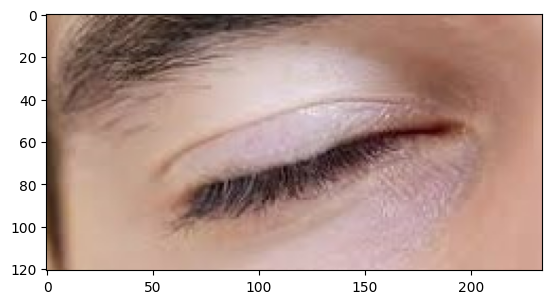

In [9]:
plt.imshow(plt.imread(r"dataset1\train\Closed\_45.jpg"))

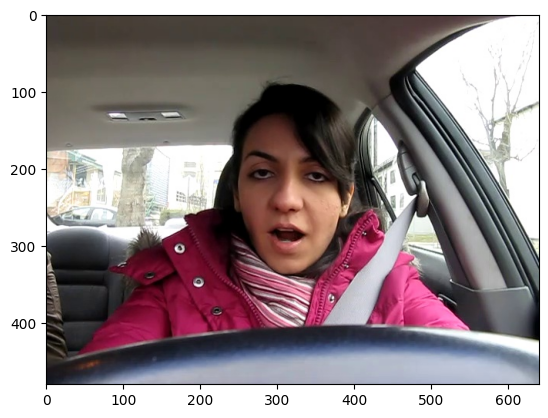

In [15]:
a = plt.imread(r"dataset1\train\yawn\10.jpg")
plt.imshow(a)

In [12]:
a.shape

(480, 640, 3)

For yawn and no yawn

In [20]:
def face_for_yawn(direc=r"dataset1\train", face_cas_path=r"xml files\haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_number1 = categories.index(category)
        print(class_number1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            #print(faces)
            for (x, y, w, h) in faces:
                #print(x,y,w,h)
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2) # draws a rectangle around image
                roi_color = img[y:y+h, x:x+w] # extract face
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE)) # to resize
                yaw_no.append([resized_array, class_number1]) 
    return yaw_no


yawn_no_yawn = face_for_yawn()
print(yawn_no_yawn)

0
1
[[array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [ 23, 229,  25],
        [ 51, 197,  55],
        ...,
        [ 19, 163,  21],
        [ 16, 159,  17],
        [  2, 241,   3]],

       [[  0, 255,   0],
        [ 51, 197,  55],
        [115, 125, 125],
        ...,
        [ 34,  40,  39],
        [ 31,  34,  34],
        [  5, 222,   5]],

       ...,

       [[  0, 255,   0],
        [ 16, 147,  43],
        [ 35,  12,  97],
        ...,
        [ 75,  34, 155],
        [ 76,  33, 157],
        [ 11, 222,  23]],

       [[  0, 255,   0],
        [ 18, 148,  46],
        [ 39,  14, 102],
        ...,
        [ 76,  36, 156],
        [ 77,  35, 157],
        [ 11, 222,  23]],

       [[  0, 255,   0],
        [  3, 239,   7],
        [  6, 219,  15],
        ...,
        [ 11, 222,  23],
        [ 11, 222,  23],
        [  2, 250,

In [22]:
print(len(yawn_no_yawn))
# 473 * 2 * 145

473


For close and open eyes

In [23]:
def get_data(dir_path=r"dataset1\train", face_cas=r"dataset1\haarcascade_frontalface_default.xml", eye_cas=r"dataset1\haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [24]:
data_train = get_data()

2
3


In [26]:
data_train

[[array([[[ 77,  77,  93],
          [ 75,  75,  91],
          [ 72,  72,  88],
          ...,
          [140, 123, 136],
          [134, 117, 130],
          [133, 119, 131]],
  
         [[ 79,  79,  95],
          [ 78,  78,  94],
          [ 75,  75,  91],
          ...,
          [126, 109, 122],
          [125, 108, 121],
          [123, 109, 121]],
  
         [[ 79,  80,  94],
          [ 79,  80,  94],
          [ 77,  77,  93],
          ...,
          [120, 103, 116],
          [116,  99, 112],
          [118, 104, 116]],
  
         ...,
  
         [[ 96,  92, 121],
          [ 96,  92, 121],
          [ 95,  91, 120],
          ...,
          [101, 101, 131],
          [102, 102, 132],
          [101, 101, 131]],
  
         [[ 96,  92, 121],
          [ 96,  92, 121],
          [ 97,  93, 122],
          ...,
          [102, 102, 132],
          [102, 102, 132],
          [ 99,  99, 129]],
  
         [[ 97,  92, 121],
          [ 96,  91, 120],
          [ 98,  93, 122

Combining all data

In [27]:
def append_data():
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [28]:
modified_data = append_data()

0
1
2
3


C:\Users\eshwa\AppData\Local\Temp\ipykernel_13728\3548787232.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


In [34]:
modified_data.shape

(1925, 2)

Saparating features(images) and labels

In [36]:
X = []
y = []
for feature, label in modified_data:
    X.append(feature)
    y.append(label)

In [37]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [40]:
X.shape

(1925, 145, 145, 3)

To transform categorical labels into a binary (one-hot) format

In [42]:
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [43]:
y = np.array(y)

Train test split

In [44]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [58]:
len(X_test)

578

Importing libraries for model training

In [48]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

Generating images for training (batch-wize)

In [49]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

#train_generator = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#test_generator = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

In [59]:
len(train_generator[0])

2

In [62]:
len(train_generator[0][0])

32

In [63]:
# 43 * 2 * 32 is the dimensions

In [65]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(145,145,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")


In [66]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 143, 143, 256)  │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 71, 71, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 69, 69, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 495,140 (1.89 MB)

 Trainable params: 495,140 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history = model.fit(train_generator, epochs=7, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9011 - loss: 0.2276 - val_accuracy: 0.9100 - val_loss: 0.2098
Epoch 2/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9230 - loss: 0.1856 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9285 - loss: 0.1943 - val_accuracy: 0.9308 - val_loss: 0.1595
Epoch 4/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9264 - loss: 0.1892 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9309 - loss: 0.1591 - val_accuracy: 0.9481 - val_loss: 0.1335
Epoch 6/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.9391 - loss: 0.1460 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/7
43/43 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.9272 - loss: 0.1670 - val_accuracy: 0.9135 - val_loss: 0.1684


In [71]:
# accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(accuracy))

# plt.plot(epochs, accuracy, "b", label="training accuracy")
# plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
# plt.legend()
# plt.show()

# plt.plot(epochs, loss, "b", label="training loss")
# plt.plot(epochs, val_loss, "r", label="validation loss")
# plt.legend()
# plt.show()

Saving the model

In [72]:
model.save("drowiness_new7.h5")

Predictions:

In [76]:
prediction_prob = model.predict(X_test)
prediction = np.argmax(prediction_prob, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 447ms/step


In [77]:
prediction

array([2, 3, 2, 3, 0, 3, 3, 2, 0, 2, 3, 3, 3, 2, 2, 2, 3, 2, 0, 3, 2, 3,
       2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 0, 3, 3, 2, 2, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 3, 0, 2, 1, 3, 3, 2, 2, 2, 0, 3, 3, 2, 2, 2, 3,
       2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2, 2, 0,
       3, 3, 2, 3, 3, 3, 1, 2, 3, 0, 3, 3, 3, 3, 3, 0, 2, 3, 2, 0, 2, 3,
       3, 1, 2, 0, 0, 3, 3, 3, 2, 2, 3, 3, 2, 0, 1, 2, 3, 2, 2, 0, 3, 2,
       1, 3, 0, 2, 3, 3, 2, 2, 2, 2, 2, 0, 3, 3, 2, 3, 2, 0, 2, 3, 3, 3,
       3, 0, 1, 0, 3, 1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 3,
       2, 2, 0, 2, 3, 0, 2, 2, 3, 2, 3, 0, 2, 2, 0, 3, 2, 2, 2, 3, 2, 0,
       3, 2, 3, 0, 2, 0, 0, 1, 2, 3, 2, 0, 3, 0, 2, 2, 2, 2, 1, 3, 2, 2,
       1, 0, 2, 3, 3, 3, 3, 0, 0, 2, 0, 0, 3, 3, 1, 3, 3, 2, 3, 3, 0, 1,
       0, 0, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 1, 2, 2, 2, 0, 3, 3, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 2,
       2, 3, 2, 2, 2, 3, 2, 0, 2, 2, 0, 3, 2, 3, 1,

In [78]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [79]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.64      0.73      0.68        63
     no_yawn       0.89      0.42      0.57        74
      Closed       0.83      0.99      0.90       215
        Open       0.95      0.91      0.93       226

    accuracy                           0.86       578
   macro avg       0.83      0.76      0.77       578
weighted avg       0.86      0.86      0.85       578



In [84]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="xml files/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("results.h5")

In [91]:
# prepare("dataset1/train/no_yawn/1068.jpg")
prediction = model.predict([prepare(r"dataset1\train\no_yawn\1067.jpg")])
np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


2

In [86]:
prediction = model.predict([prepare(r"dataset1\train\Closed\_101.jpg")])
np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


2

In [92]:
prediction = model.predict([prepare(r"dataset1\train\yawn\1.jpg")])
np.argmax(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


3